<a href="https://colab.research.google.com/github/Arnav613Gupta/machine_learning/blob/main/Linear_Regression_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression**

In this notebook we are creating a linear regression modal from the scratch.

**About**

Linear regression is used to predict value of data where there is a linear pattern in data.

**Equation**

y = w1 * x1 + w2 * x2 + ......+ b

for only 1 feature it becomes

y = w * x + b

where,

Y -> output / prediction

X -> input features

w1, w2, w3 .. -> weight associated or the slope

b -> bias ( or simply c in eq. y = mx + c)


Gradient Descent:
It is optimised Algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of of the learning model.

w = w - alpha * dw

b = b - alpha * db


where, alpha is the learning rate

learning rate ( alpha) = step size a parameter should change

no_of_iteration = no of times modal has to go to data points

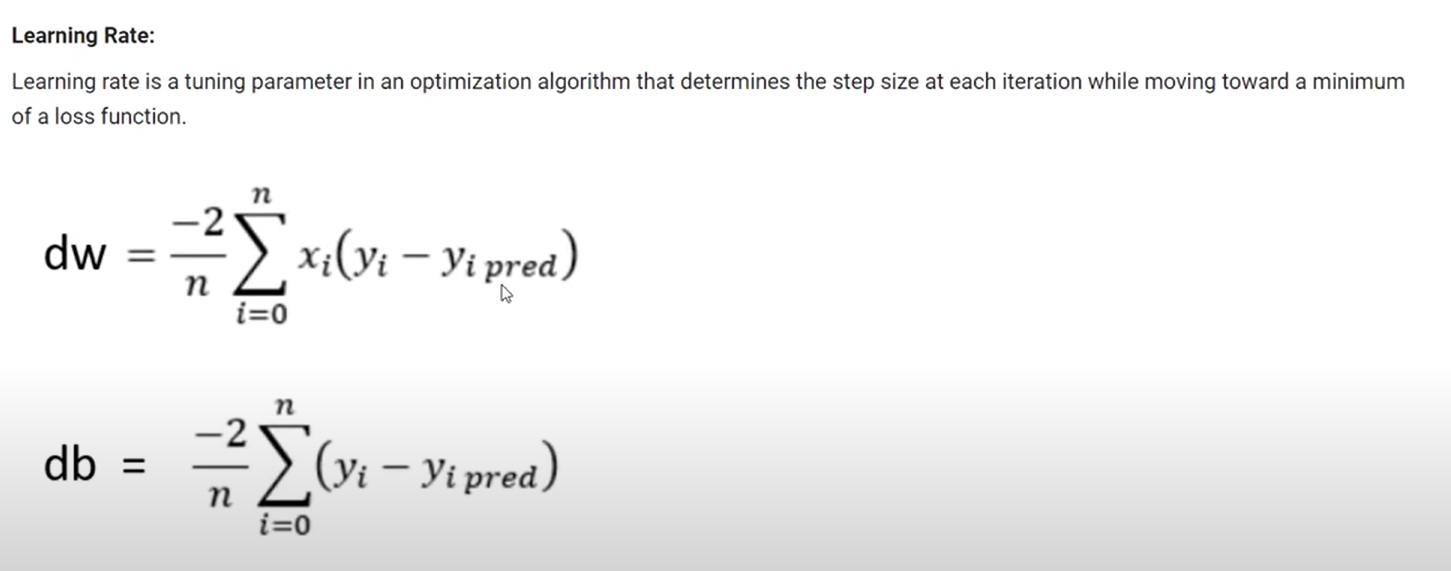


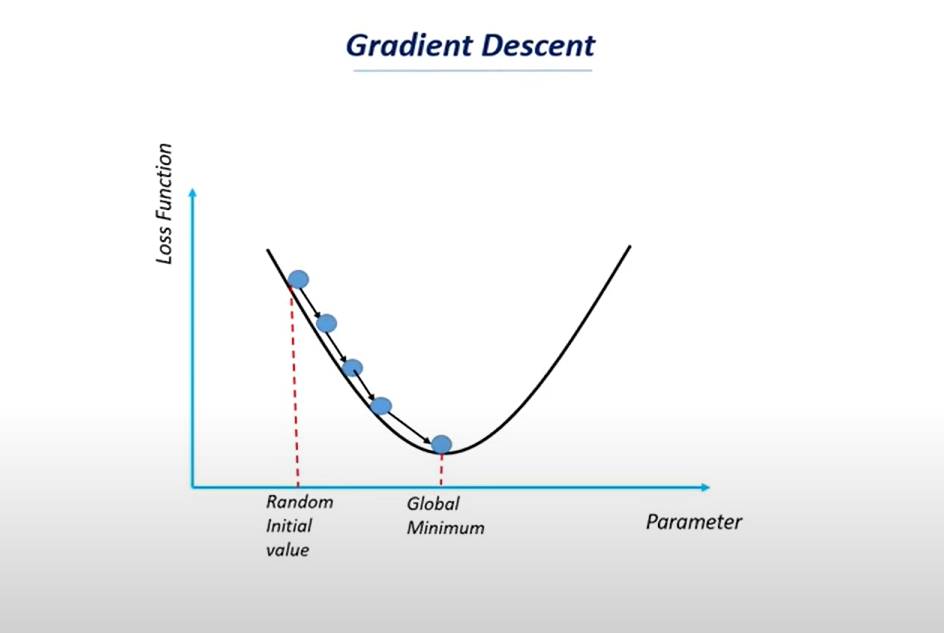

**Building Modal**

In [ ]:
# importing Libraries
import numpy as np

In [ ]:
class LinearRegression:

  #initialise Parameter( learning rate, no of iterations )
  def __init__(self, learning_rate, no_of_iteration):

    self.learning_rate= learning_rate
    self.no_of_iteration= no_of_iteration


  def fit(self, X, Y):
    # no of training examples[m]( no of data points) (rows)  and no of features [n] (columns)

    self.m, self.n = X.shape

    #initiating weigth and bias

    self.weights = np.zeros(self.n)  #Every feature will have weight associated with it w1,w2 ...

    self.bias = 0  # there is only 1 bias in equation
    self.X = X
    self.Y = Y

    #implementing Gradient Descent
    for i in range (self.no_of_iteration):
      self.updateWeight()



  def updateWeight(self):

    Y_prediction = self.predict(self.X)

    #Calculating Gradients

    dw = ( 2 * (self.X.T).dot(-self.Y + Y_prediction)) / self.m   # .T is transpose
    db = np.sum(-self.Y + Y_prediction)  / self.m

    # updating weights
    self.weights = self.weights - self.learning_rate * dw
    self.bias = self.bias - self.learning_rate * db


  def predict(self, X):
    return X.dot(self.weights) + self.bias



Using Linear regression modal for prediction

In [ ]:
# Importing Pandas
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


Data Pre Processing

In [ ]:
# loading to pd dataframe

salary_data = pd.read_csv("/content/drive/MyDrive/Databases /salary_data.csv")



In [ ]:
#show first 5 rows
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
#show last 5 rows
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [ ]:
# no of rows and columns
salary_data.shape


(30, 2)

In [ ]:
#checking missing values
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


Splitting feature and target

In [ ]:
X = salary_data.copy()
X.drop('Salary', axis=1, inplace = True)
Y = salary_data['Salary']

In [ ]:
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [ ]:
Y.head()

,Salary
0,39343
1,46205
2,37731
3,43525
4,39891


Split data in training data and test data

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=2)

Training the model

In [ ]:
model = LinearRegression(learning_rate=0.001, no_of_iteration=10000)

In [ ]:
model.fit(X_train,Y_train)

In [ ]:
print("a0 " ,model.weights,"\nbias :",model.bias)

a0  YearsExperience    9977.753
dtype: float64 
bias : 20378.046819736366


In [ ]:
test_data_prediction = model.predict(X_test)

Visualizng the predicted values & actual values

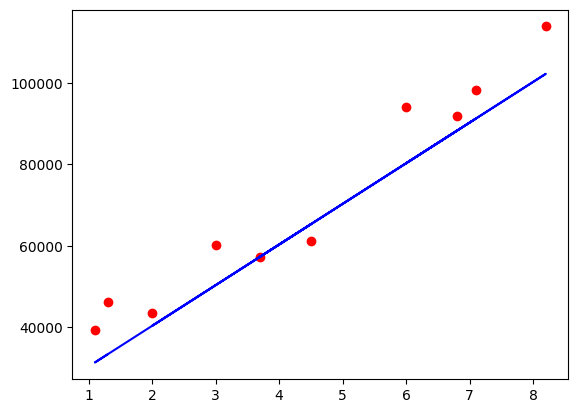

In [ ]:
plt.scatter(X_test,Y_test,color = "red")
plt.ticklabel_format(style='plain')
plt.plot(X_test,test_data_prediction,color = "blue")
plt.show()